In [716]:
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [717]:
filePath23 = r'Movies2023.csv'
filePath24 = r'movies2024.csv'
df1 = pd.read_csv(filePath23)
df2 = pd.read_csv(filePath24)
df = pd.concat([df1,df2],axis = 0)
df.to_csv('combinedData.csv',index=False)
df.head()

,Unnamed: 0,@type,url,name,description,image,contentRating,genre,duration,Language,...,aggregateRating.worstRating,aggregateRating.ratingValue,aggregateRating.ratingCount,alternateName,First Day Collection India,India Net Collection,India Gross collection,India Net collection,Note,OLanguage
0,0,Movie,https://www.imdb.com/title/tt15354916/,Jawan,A prison warden recruits inmates to commit out...,https://m.media-amazon.com/images/M/MV5BOWI5Nm...,Not Rated,"Action, Crime, Drama",PT2H49M,Hindi,...,1,6.9,99934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Movie,https://www.imdb.com/title/tt12844910/,Pathaan,An Indian agent races against a doomsday clock...,https://m.media-amazon.com/images/M/MV5BYTgzNj...,Not Rated,"Action, Adventure, Thriller",PT2H26M,Hindi,...,1,5.8,158261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Movie,https://www.imdb.com/title/tt13751694/,Animal,The hardened son of a powerful industrialist r...,https://m.media-amazon.com/images/M/MV5BNGViM2...,Not Rated,"Action, Crime, Drama",PT3H24M,Hindi,...,1,6.1,98028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Movie,https://www.imdb.com/title/tt15441054/,Gadar 2,When Tara Singh goes missing during a skirmish...,https://m.media-amazon.com/images/M/MV5BODJkYj...,Not Rated,"Action, Adventure, Drama",PT2H50M,Hindi,...,1,5.1,22652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Movie,https://www.imdb.com/title/tt13927994/,Salaar: Part 1 - Ceasefire,The fate of a violently contested kingdom hang...,https://m.media-amazon.com/images/M/MV5BYWM5OG...,Not Rated,"Action, Crime, Drama",PT2H55M,Telugu,...,1,6.6,69295,Salaar,NaN,NaN,NaN,NaN,NaN,NaN


In [718]:
# def dataCleaning(df):
#     df = df.drop(columns=['aggregateRating.@type', 'aggregateRating.bestRating','aggregateRating.worstRating','Unnamed: 0','@type'])
#     df = df.rename(columns = {'aggregateRating.ratingValue':'ratingValue','aggregateRating.ratingCount':'ratingCount'})
#     df = df[df['Language'] != 'English']
#     df['Budget'] = df['Budget'].apply(lambda x: float(x.replace('cr','')))
#     df['First Day Collection Worldwide'] = df['First Day Collection Worldwide'].apply(lambda x: float(x.replace('cr','')))
#     df['Worldwide Collection'] = df['Worldwide Collection'].apply(lambda x: float(x.replace('cr','')))
#     df = df.loc[:,:'Verdict']
#     concat_genre = df['genre'].str.cat(sep=', ')
#     genre_set = (set(concat_genre.split(', ')))
#     for colName in genre_set:
#         df[colName]=0
#     row=-1
#     for genre_type in df['genre']:
#         row+=1
#         genre_sep = genre_type.split(', ')
#         for val in genre_sep:
#             df.loc[row,val]=1
#     df = df.iloc[:145,:]
#     categories = df['Verdict'].astype('category').cat.categories
#     code_to_category = pd.DataFrame({'Code': range(len(categories)),'Verdict': categories})
#     df['Verdict'] = df['Verdict'].astype('category').cat.codes
#     print(code_to_category)
    
#     categories = df['Language'].astype('category').cat.categories
#     code_to_category = pd.DataFrame({'Code': range(len(categories)),'Language': categories})
 
    
#     df['Language'] = df['Language'].astype('category').cat.codes
#     df = df.drop(columns=['url', 'name', 'description', 'image', 'contentRating', 'genre','duration','Overseas Collection', 'India Gross Collection'])

#     return df

In [719]:
def dataCleaning(df):
    # Dropping unnecessary columns
    df = df.drop(columns=['aggregateRating.@type', 'aggregateRating.bestRating', 
                          'aggregateRating.worstRating', 'Unnamed: 0', '@type'])
    
    # Renaming columns for convenience
    df = df.rename(columns={'aggregateRating.ratingValue':'ratingValue', 
                            'aggregateRating.ratingCount':'ratingCount'})
    
    # Filter out English movies
    df = df[df['Language'] != 'English']
    
    # Convert 'Budget' and collection columns from strings (with 'cr') to floats
    df['Budget'] = df['Budget'].apply(lambda x: float(x.replace('cr', '')))
    df['First Day Collection Worldwide'] = df['First Day Collection Worldwide'].apply(lambda x: float(x.replace('cr', '')))
    df['Worldwide Collection'] = df['Worldwide Collection'].apply(lambda x: float(x.replace('cr', '')))
    
    # Select only up to the 'Verdict' column (ignoring columns after it)
    df = df.loc[:, :'Verdict']
    
    # Splitting genre into separate binary columns (multi-label binarization)
    concat_genre = df['genre'].str.cat(sep=', ')
    genre_set = set(concat_genre.split(', '))
    for colName in genre_set:
        df[colName] = 0
    
    # Update genre columns with 1 if the genre exists for that row
    for row in range(len(df)):
        genre_sep = df['genre'].iloc[row].split(', ')
        for genre in genre_sep:
            df.at[row, genre] = 1
    
    # Trimming the dataframe to 145 rows
    df = df.iloc[:145, :]
    
    # Manually map 'Verdict' categories to numerical codes
    verdict_mapping = {
        'Above Average': 12,
        'All Time Blockbuster': 0,
        'Average': 14,
        'Below Average': 16,
        'Blockbuster': 2,
        'Blockbuster as of now': 4,
        'Disaster': 20,
        'Flop': 18,
        'Hit': 10,
        'Pending as of now': 22,
        'Super Hit': 6,
        'Super Hit as of now': 8
    }
    df['Verdict'] = df['Verdict'].map(verdict_mapping)
    df['Verdict'] = df['Verdict']/2
    # Manually map 'Language' categories to numerical codes
    language_mapping = {
        'Hindi': 0,
        'Kannada': 4,
        'Malayalam': 3,
        'Marathi': 5,
        'Punjabi': 6,
        'Tamil': 1,
        'Telugu': 2
    }
    df['Language'] = df['Language'].map(language_mapping)
    
    # Dropping additional unnecessary columns
    df = df.drop(columns=['url', 'name', 'description', 'image', 'contentRating', 'genre', 
                          'duration', 'Overseas Collection', 'India Gross Collection'])
    
    # Sort by the 'Verdict' column (ascending order, best to worst performance)
    df = df.sort_values(by='Verdict', ascending=True)
    
    return df

In [720]:
df = dataCleaning(df)
df.to_csv('finalDf.csv',index=False)
df

,Language,Budget,First Day Collection Worldwide,Worldwide Collection,Verdict,History,Romance,Horror,Musical,Biography,...,Comedy,War,Fantasy,Sport,Crime,Action,Sci-Fi,Adventure,Family,Drama
0,0.0,285.0,129.6,1150.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,250.0,104.8,1042.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
19,3.0,15.0,3.5,180.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,3.0,15.0,6.9,241.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
35,6.0,15.0,10.2,101.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,2.0,55.0,11.2,31.6,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
62,0.0,75.0,8.2,47.5,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
37,NaN,95.0,7.6,54.6,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
43,3.0,25.0,6.3,41.2,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [721]:
df = df.drop(df[df['Language'] == -1].index)

In [722]:
grouped_df_size = df.groupby(['Language']).size()
grouped_df_size

Language
0.0    39
1.0    33
2.0    42
3.0    22
4.0     4
5.0     1
6.0     3
dtype: int64

In [723]:
grouped_df_mean = df.groupby(['Language']).mean()
grouped_df_mean

,Budget,First Day Collection Worldwide,Worldwide Collection,Verdict,History,Romance,Horror,Musical,Biography,Mystery,...,Comedy,War,Fantasy,Sport,Crime,Action,Sci-Fi,Adventure,Family,Drama
Language,,,,,,,,,,,,,,,,,,,,,
0.0,98.333333,25.917949,241.061538,5.461538,0.025641,0.076923,0.025641,0.025641,0.000000,0.025641,...,0.487179,0.000000,0.00000,0.0,0.205128,0.692308,0.025641,0.153846,0.102564,0.769231
1.0,76.060606,22.900000,127.187879,4.696970,0.030303,0.121212,0.060606,0.000000,0.000000,0.030303,...,0.333333,0.000000,0.00000,0.0,0.272727,0.757576,0.000000,0.181818,0.090909,0.787879
2.0,63.642857,25.669048,108.951190,5.166667,0.000000,0.095238,0.166667,0.023810,0.023810,0.000000,...,0.309524,0.000000,0.02381,0.0,0.261905,0.595238,0.000000,0.190476,0.142857,0.619048
3.0,21.181818,6.650000,80.550000,3.818182,0.000000,0.136364,0.000000,0.000000,0.090909,0.000000,...,0.363636,0.000000,0.00000,0.0,0.181818,0.636364,0.000000,0.045455,0.090909,0.863636
4.0,31.250000,6.050000,30.050000,5.750000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.250000,0.750000,0.250000,0.000000,0.000000,0.500000
5.0,5.000000,1.500000,90.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
6.0,16.666667,9.433333,92.766667,0.666667,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,...,0.333333,0.333333,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667


In [724]:
grouped_df_sum = df.groupby(['Language']).sum()
grouped_df_sum

,Budget,First Day Collection Worldwide,Worldwide Collection,Verdict,History,Romance,Horror,Musical,Biography,Mystery,...,Comedy,War,Fantasy,Sport,Crime,Action,Sci-Fi,Adventure,Family,Drama
Language,,,,,,,,,,,,,,,,,,,,,
0.0,3835.0,1010.8,9401.40,213.0,1.0,3.0,1.0,1.0,0.0,1.0,...,19.0,0.0,0.0,0.0,8.0,27.0,1.0,6.0,4.0,30.0
1.0,2510.0,755.7,4197.20,155.0,1.0,4.0,2.0,0.0,0.0,1.0,...,11.0,0.0,0.0,0.0,9.0,25.0,0.0,6.0,3.0,26.0
2.0,2673.0,1078.1,4575.95,217.0,0.0,4.0,7.0,1.0,1.0,0.0,...,13.0,0.0,1.0,0.0,11.0,25.0,0.0,8.0,6.0,26.0
3.0,466.0,146.3,1772.10,84.0,0.0,3.0,0.0,0.0,2.0,0.0,...,8.0,0.0,0.0,0.0,4.0,14.0,0.0,1.0,2.0,19.0
4.0,125.0,24.2,120.20,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,2.0
5.0,5.0,1.5,90.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6.0,50.0,28.3,278.30,2.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [725]:
grouped_df = df.groupby('Language')

In [726]:
def plot_with_language():
    colors = np.random.rand(len(grouped_df_sum))
    plt.scatter(grouped_df_sum['Budget'], grouped_df_sum['Worldwide Collection'], s=grouped_df_sum['First Day Collection Worldwide'], alpha=0.5,c=colors)
    plt.xlabel('Budget')
    plt.ylabel('Worldwide Collection')
    plt.colorbar(label='Color Scale')
    plt.show()


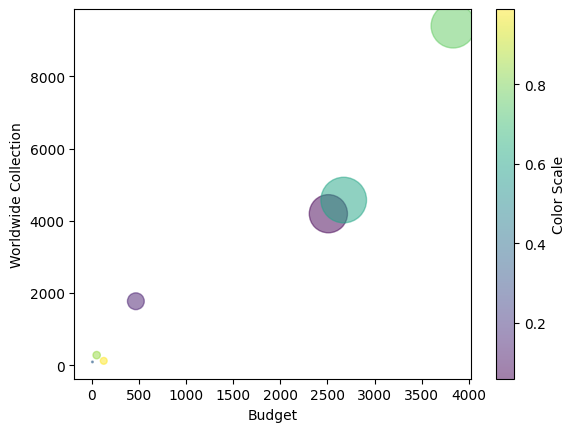

In [727]:
plot_with_language()

Hindi - df1
Telugu - df2
Tamil - df3
Rest - Combining 4 rest language

In [728]:
df_Hindi = grouped_df.get_group(0)
df_Telugu = grouped_df.get_group(1)
df_Tamil = grouped_df.get_group(2)
combined_df = pd.concat([df_Telugu,df_Tamil,df_Hindi])

In [729]:
X = combined_df.drop(columns=['Worldwide Collection'])
y = combined_df[['Worldwide Collection']]

In [730]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
lr_movie1 = LinearRegression()
lr_movie1.fit(X_train,y_train)
y_pred_train = lr_movie1.predict(X_train)
y_pred_test = lr_movie1.predict(X_test)
print(f'r2 for train {r2_score(y_pred_train,y_train)}')
print(f'r2 for test {r2_score(y_pred_test,y_test)}')

r2 for train 0.8595391045486149
r2 for test 0.7946014253163556


In [731]:
# y_pred_train_df = pd.DataFrame(y_pred_train,columns=['World Wide Collections pred'])
# y_pred_train_df['Verdict'] = X_train['Verdict'].values
# lr_movie2 = LinearRegression()
# lr_movie2.fit(y_pred_train_df,y_train)
# y_pred_train_final = lr_movie2.predict(y_pred_train_df)
# # y_pred_test_final = lr_movie2.predict(y_pred_test)

# print(f'r2 for train {r2_score(y_pred_train_final,y_train)}')
# # print(f'r2 for test {r2_score(y_pred_test_final,y_test)}')

In [732]:
# ridge = Ridge()

# params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,100]}
# ridge_regressor = GridSearchCV(ridge,params,scoring = 'neg_mean_absolute_error',cv = 5)
# ridge_regressor.fit(y_pred_train_final,y_train)
# ridge_pred_train = ridge_regressor.predict(y_pred_train_final)
# # ridge_pred_test = ridge_regressor.predict(X_test)

# print(f"r2score for ridge_train = {r2_score(ridge_pred_train,y_train)}")
# # print(f"r2score for ridge_test = {r2_score(ridge_pred_test,y_test)}")


In [733]:
X.columns

Index(['Language', 'Budget', 'First Day Collection Worldwide', 'Verdict',
       'History', 'Romance', 'Horror', 'Musical', 'Biography', 'Mystery',
       'Thriller', 'Comedy', 'War', 'Fantasy', 'Sport', 'Crime', 'Action',
       'Sci-Fi', 'Adventure', 'Family', 'Drama'],
      dtype='object')

In [734]:
data = [
    [0, 210,58, 8, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
]
# data = [
#     [6, 125,73.5, 2]
# ]
forecasting_df = pd.DataFrame(data,columns=X_train.columns)
#lr_movie1.predict(forecasting_df)


In [735]:
# from sklearn.preprocessing import RobustScaler
# import pandas as pd
# from sklearn.metrics import mean_squared_error

# scalar = RobustScaler()
# df_robust_scalar_X_train = pd.DataFrame(scalar.fit_transform(X_train))
# df_robust_scalar_X_test = scalar.transform(X_test)
# lr2 = LinearRegression()
# lr2.fit(df_robust_scalar_X_train,y_train)
# y_pred_train = lr2.predict(df_robust_scalar_X_train)
# y_pred_test = lr2.predict(df_robust_scalar_X_test)
# print(f'r2 for train {r2_score(y_pred_train,y_train)}')
# print(f'r2 for test {r2_score(y_pred_test,y_test)}')
# print(f'mse is {mean_squared_error(y_test, y_pred_test)}')

In [736]:
# lr2.predict(scalar.transform(forecasting_df))


In [737]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,100]}
ridge_regressor = GridSearchCV(ridge,params,scoring = 'neg_mean_absolute_error',cv = 5)
ridge_regressor.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.77293e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.14527e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.29381e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.26503e-21): result may not be acc

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 100]},
             scoring='neg_mean_absolute_error')

In [738]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,100]}
lasso_regressor = GridSearchCV(lasso,params,scoring = 'neg_mean_absolute_error',cv = 5)
lasso_regressor.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.467e+05, tolerance: 3.803e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.580e+05, tolerance: 4.548e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 100]},
             scoring='neg_mean_absolute_error')

In [739]:
ridge_pred_train = ridge_regressor.predict(X_train)
lasso_pred_train = lasso_regressor.predict(X_train)
ridge_pred_test = ridge_regressor.predict(X_test)
lasso_pred_test = lasso_regressor.predict(X_test)

print(f"r2score for ridge_train = {r2_score(ridge_pred_train,y_train)}")
print(f"r2score for lasso_train = {r2_score(lasso_pred_train,y_train)}")
print(f"r2score for ridge_test = {r2_score(ridge_pred_test,y_test)}")
print(f"r2score for ridge_test = {r2_score(lasso_pred_test,y_test)}")

r2score for ridge_train = 0.8378442496524213
r2score for lasso_train = 0.8238486852714118
r2score for ridge_test = 0.6865299587366269
r2score for ridge_test = 0.640515527332459


In [740]:
print(f"ridge - {ridge_regressor.predict(forecasting_df)}")
print(f"lasso - {lasso_regressor.predict(forecasting_df)}")


ridge - [[326.44005463]]
lasso - [325.48285467]


In [741]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_meta_train = np.column_stack((ridge_pred_train, lasso_pred_train, y_pred_train))
meta_model = Ridge()
meta_model.fit(X_meta_train, y_train)
pred1_test = ridge_regressor.predict(X_test)
pred2_test = lasso_regressor.predict(X_test)
pred3_test = lr_movie1.predict(X_test)

X_meta_test = np.column_stack((pred1_test, pred2_test, pred3_test))

final_predictions = meta_model.predict(X_meta_test)
mse = mean_squared_error(y_test, final_predictions)
print(f"Mean Squared Error of the Stacking Model: {mse}")
r2_score(final_predictions,y_test)

Mean Squared Error of the Stacking Model: 6169.538499287741


0.7946000461028454

In [742]:
r2_score(final_predictions,y_test)

0.7946000461028454

CASCADING APPROACH - IMPROVE FROM ERROR

In [743]:
combined_df

,Language,Budget,First Day Collection Worldwide,Worldwide Collection,Verdict,History,Romance,Horror,Musical,Biography,...,Comedy,War,Fantasy,Sport,Crime,Action,Sci-Fi,Adventure,Family,Drama
53,1.0,20.0,4.5,55.6,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
35,1.0,20.0,6.2,60.4,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46,1.0,30.0,11.2,73.8,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41,1.0,20.0,5.2,48.8,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24,1.0,35.0,5.6,98.6,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.0,50.0,3.4,27.2,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
63,0.0,75.0,3.8,45.7,10.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
33,0.0,150.0,10.4,68.6,10.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
50,0.0,90.0,4.2,33.8,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [744]:
# X = df.loc[:,['Language','Budget','First Day Collection Worldwide','Verdict']]
# y = df[['Worldwide Collection']]

In [745]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lr1 = LinearRegression()
lr1.fit(X_train,y_train)
y_pred_train = lr1.predict(X_train)
y_pred_test = lr1.predict(X_test)
residuals = y_train - y_pred_train
log_residuals = np.log(np.abs(residuals))  # Take the log of the residuals
print(f'r2 for train {r2_score(y_pred_train,y_train)}')
print(f'r2 for test {r2_score(y_pred_test,y_test)}')
mse = mean_squared_error(y_pred_train, y_train)
print(f"Mean Squared Error of the Stacking Model: {mse}")

r2 for train 0.8768913443865058
r2 for test 0.7983341991868926
Mean Squared Error of the Stacking Model: 6427.510348822118


In [746]:
lr2 = LinearRegression()
lr2.fit(X_train,log_residuals)
pred1_test = lr1.predict(X_train)
pred2_test = lr2.predict(X_train)
alpha = 1.15
final_predictions = (alpha)*pred1_test + (1-alpha)*pred2_test
print(f'r2 for train {r2_score(final_predictions,y_train)}')
mse = mean_squared_error(final_predictions, y_train)
print(f"Mean Squared Error of the Stacking Model: {mse}")

r2 for train 0.8806604769038303
Mean Squared Error of the Stacking Model: 8230.543667796372


In [747]:
X.columns

Index(['Language', 'Budget', 'First Day Collection Worldwide', 'Verdict',
       'History', 'Romance', 'Horror', 'Musical', 'Biography', 'Mystery',
       'Thriller', 'Comedy', 'War', 'Fantasy', 'Sport', 'Crime', 'Action',
       'Sci-Fi', 'Adventure', 'Family', 'Drama'],
      dtype='object')

        'Above Average': 12,
        'All Time Blockbuster': 0,
        'Average': 14,
        'Below Average': 16,
        'Blockbuster': 2,
        'Blockbuster as of now': 4,
        'Disaster': 20,
        'Flop': 18,
        'Hit': 10,
        'Pending as of now': 22,
        'Super Hit': 6,
        'Super Hit as of now': 8

In [966]:
data = [
    [0, 210, 58, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # WAR
    [2, 90, 45, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],   # Maharshi
    [2, 150, 63.7, 6, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], # Pushpa
    [1, 135, 49, 10, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1] # Master

]

forecasting_df = pd.DataFrame(data,columns=X_train.columns)

In [1035]:
devara_data = [
    [2, 300, 140, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], #  -  Blockbuster 
    [2, 300, 140, 14, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], # - Average
    [2, 300, 140, 22, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], #  -  Flop 

]
Devara_forecasting_df = pd.DataFrame(devara_data,columns=X_train.columns)

In [1036]:
pred1_test = lr1.predict(forecasting_df)
pred2_test = lr2.predict(forecasting_df)
final_predictions = (alpha)*pred1_test + (1-alpha)*pred2_test


In [1037]:
final_predictions

array([[569.99601081],
       [175.2701854 ],
       [319.63817497],
       [256.97756386]])

In [1038]:
pred1_test = lr1.predict(Devara_forecasting_df)
pred2_test = lr2.predict(Devara_forecasting_df)
final_predictions = (alpha)*pred1_test + (1-alpha)*pred2_test
final_predictions

array([[793.47287997],
       [625.23794638],
       [475.69578318]])